In [1]:
#%matplotlib widget

import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

from FisherDA import MultipleFisherDiscriminantAnalysis as MDA

ModuleNotFoundError: No module named 'FisherDA'

# INTRODUZIONE

Il Wine Quality è una raccolta di due datasets (red_wine e white_wine) presente nella UCI machine learning repository.

I vari attributi che compongono i due datasets sono i risultati di test chimico-fisici e sensoriali effettuati su campioni di vinho verde portoghese, volti a determinarne la qualità. 

I vini vengono infatti divisi, tramite l' attributo 'quality' in 10 classi (da 1 a 10), ciascuna delle quali rappresenta un diverso grado di eccellenza. Tanto più alto è il numero della classe di appartenza di un campione di vino e tanto maggiore è il suo valore.

# IMPORTAZIONE DATABASE REDWINE

Si inizia con l' importare il primo database, rinominando le colonne e assicurandoci che i valori siano importati correttamente.

In [ ]:
red_wine = pd.read_csv('Data_Sets/winequality-red.CSV', sep=';', header=None).drop(0)

col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality' ]
rename_dict = {k: col_names[k] for k in range(12)}
red_wine.rename(columns=rename_dict, inplace=True)

#red_wine.sort_values('quality', inplace=True)
#red_wine.reset_index(drop=True, inplace=True)

red_wine = red_wine.apply(pd.to_numeric) # convert all columns of DataFrame


In [ ]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


A seguire si crea un vettore colori personalizzato e si stampa il conteggio classi, con la rispettiva frequenza

In [ ]:
colors_numbers1 = [3, 4, 5, 6, 7, 8]
colors1 = ['red', 'orange', 'yellow', 'lime', 'deepskyblue', 'blue']
quality1 = red_wine.iloc[:, -1].copy()
quality1.replace(colors_numbers1, value=colors1, inplace=True)

,counts,freq.
class,,
3,10,0.006254
4,53,0.033146
5,681,0.425891
6,638,0.398999
7,199,0.124453
8,18,0.011257


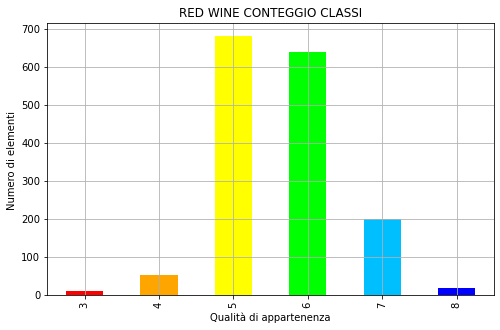

In [ ]:
M1, N1 = red_wine.shape
class_cont_freq = pd.concat([red_wine['quality'].value_counts(), red_wine['quality'].value_counts()/M1], axis=1)
class_cont_freq.columns = ['counts', 'freq.']  
class_cont_freq.index.name = 'class'
class_cont_freq.sort_values('class', inplace=True)

display(class_cont_freq)

plt.figure()
class_cont_freq['counts'].plot.bar(figsize=(8,5), color=['red', 'orange', 'yellow', 'lime', 'deepskyblue', 'blue'])
plt.title('RED WINE CONTEGGIO CLASSI')
plt.xlabel("Qualità di appartenenza")
plt.ylabel("Numero di elementi ")
plt.grid()
plt.show()

# WHITE WINE DATABASE

Si importa il secondo database, rinominando le colonne e assicurandoci che i valori siano importati correttamente.

In [ ]:
white_wine = pd.read_csv('Data_Sets/winequality-white.CSV', sep=';', header=None).drop(0)

col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality' ]
rename_dict = {k: col_names[k] for k in range(12)}
white_wine.rename(columns=rename_dict, inplace=True)

#white_wine.sort_values('quality', inplace=True)
#white_wine.reset_index(drop=True, inplace=True)
white_wine = white_wine.apply(pd.to_numeric)

In [ ]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4895,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4896,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4897,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


A seguire si crea un vettore colori personalizzato e si stampa il conteggio classi, con la rispettiva frequenza.

In [ ]:
colors_numbers2 = [3, 4, 5, 6, 7, 8, 9]
colors2 = ['red', 'orange', 'yellow', 'lime', 'deepskyblue', 'blue', 'violet']
quality2 = white_wine.iloc[:, -1].copy()
quality2.replace(colors_numbers2, value=colors2, inplace=True)

,counts,freq.
class,,
3,20,0.004083
4,163,0.033279
5,1457,0.297468
6,2198,0.448755
7,880,0.179665
8,175,0.035729
9,5,0.001021


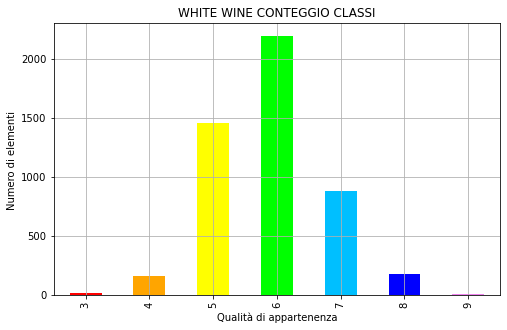

In [ ]:
M2, N2 = white_wine.shape
class_cont_freq = pd.concat([white_wine['quality'].value_counts(), white_wine['quality'].value_counts()/M2], axis=1)
class_cont_freq.columns = ['counts', 'freq.']  
class_cont_freq.index.name = 'class'
class_cont_freq.sort_values('class', inplace=True)

display(class_cont_freq)
plt.figure()
class_cont_freq['counts'].plot.bar(figsize=(8,5), color=['red', 'orange', 'yellow', 'lime', 'deepskyblue', 'blue', 'violet'])
plt.title('WHITE WINE CONTEGGIO CLASSI')
plt.xlabel("Qualità di appartenenza")
plt.ylabel("Numero di elementi ")
plt.grid()

# STUDIO DELLA NORMALITA' DEL DATASET

Controlliamo se i dati dei due dataset seguono una distribuzione normale. Utilizziamo due modi:
 - **Histogram Plot**: i dati di ciascuna feature del DF vengono divisi in un numero specifico di intervalli e si procede con il rappresentare in un plot il numero di campioni con il loro intervallo di appartenenza.
 - **Q-Q Plot**: il Q-Q Plot è la rappresentazione grafica dei quantili di una distribuzione. Viene cioè confrontata la distribuzione cumulata della variabile osservata con la distribuzione cumulata della normale. Se la feature osservata presenta una distribuzione normale, i punti di questa distribuzione congiunta si addensano sulla diagonale che va dal basso verso l'alto e da sinistra verso destra.

In [ ]:
import pylab
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import normaltest

## - RED WINE

###  Histogram Plot

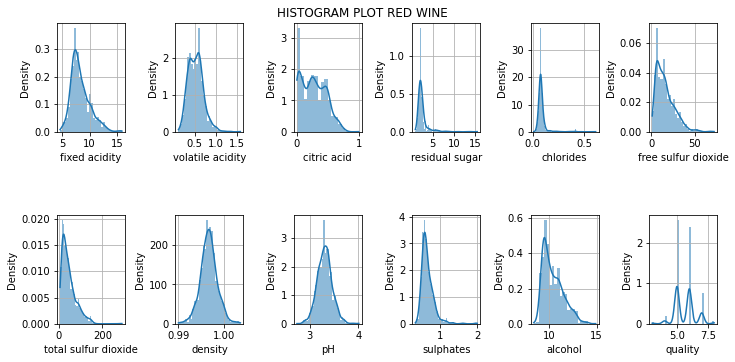

In [ ]:
Hfig_redwine, ax = plt.subplots(ncols=6, nrows=2, figsize=(10,5))
index = 0
ax = ax.flatten()
for col, value in red_wine.items():
    sns.histplot(value, ax=ax[index], kde=True, stat="density", linewidth=0) 
    ax[index].grid()
    index += 1
    
# ° stat="density" ha il compito di normalizzare i conteggi in modo che l' area dell' istogramma sia uguale a 1
# questo garantisce una più comprensibile visione del grafico
# ° kde=True effettua un plot della distribuzione per confrontarlo piu facilmente con la gaussiana

Hfig_redwine.suptitle('HISTOGRAM PLOT RED WINE')
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Q-Q Plot

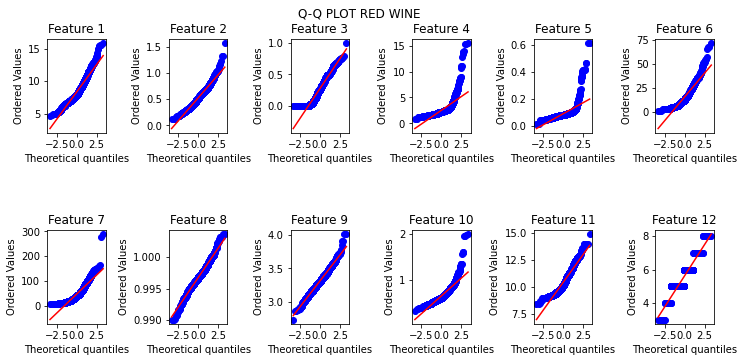

In [ ]:
QQfig_redwine, ax = plt.subplots(ncols=6, nrows=2, figsize=(10, 5))
index = 0
ax = ax.flatten()
for col, value in red_wine.items():
    stats.probplot(red_wine.iloc[:, index], dist="norm", plot=ax[index])
    ax[index].set_title("Feature %d" % (index+1))
    index += 1
QQfig_redwine.suptitle('Q-Q PLOT RED WINE')
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

## - WHITE WINE

###  Histogram Plot

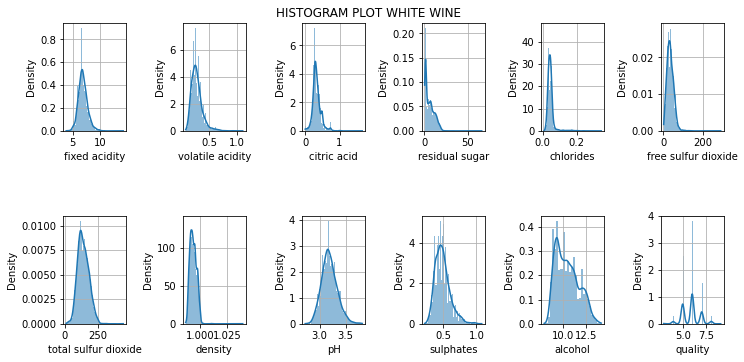

In [ ]:
Hfig_whitewine, ax = plt.subplots(ncols=6, nrows=2, figsize=(10,5))
index = 0
ax = ax.flatten()
for col, value in white_wine.items():
    sns.histplot(value, ax=ax[index], kde=True, stat="density", linewidth=0)
    ax[index].grid()
    index += 1
Hfig_whitewine.suptitle('HISTOGRAM PLOT WHITE WINE')
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Q-Q Plot

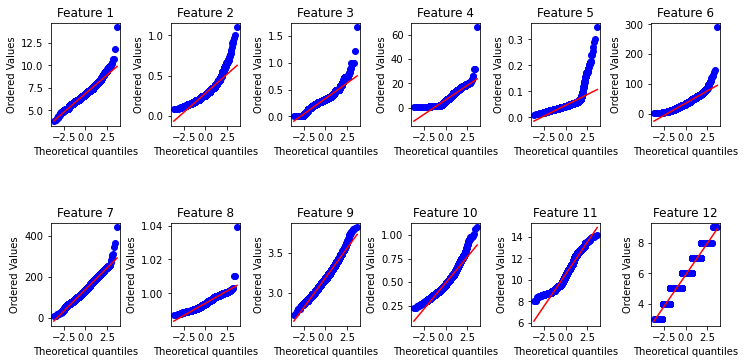

In [ ]:
QQfig_whitewine, ax = plt.subplots(ncols=6, nrows=2, figsize=(10, 5))
index = 0
ax = ax.flatten()
for col, value in white_wine.items():
    stats.probplot(white_wine.iloc[:, index], dist="norm", plot=ax[index])
    ax[index].set_title("Feature %d" % (index+1))
    index += 1
QQfig_redwine.suptitle('Q-Q PLOT WHITE WINE')
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

# PCA

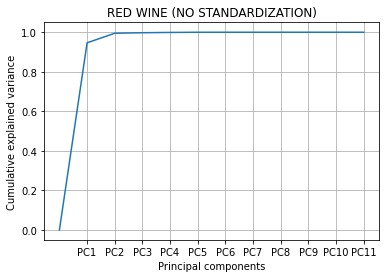

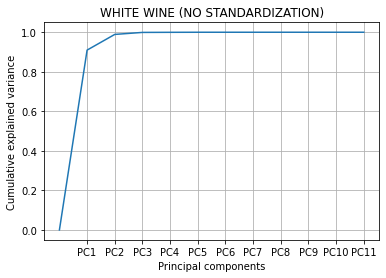

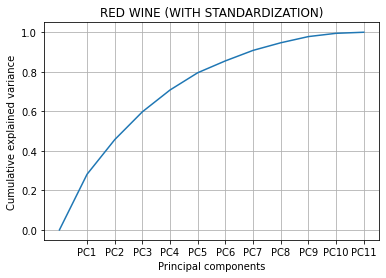

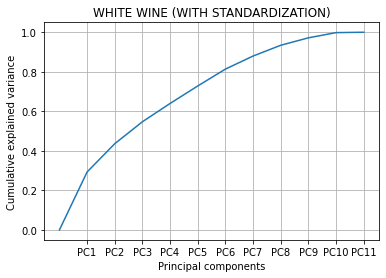

In [ ]:
X_redwine = red_wine.iloc[:, :-1]  
X_whitewine = white_wine.iloc[:, :-1]  

scaler_redwine = StandardScaler()
scaler_whitewine = StandardScaler()
scaler_redwine.fit(X_redwine.values)
scaler_whitewine.fit(X_whitewine.values)

X_redwine_scaled = scaler_redwine.transform(X_redwine.values)
X_whitewine_scaled = scaler_whitewine.transform(X_whitewine.values)

pca_redwine_nostd = PCA()
pca_whitewine_nostd = PCA()
pca_redwine = PCA()
pca_whitewine = PCA()

pca_redwine_nostd.fit(X_redwine.values)
pca_whitewine_nostd.fit(X_whitewine.values)
pca_redwine.fit(X_redwine_scaled)
pca_whitewine.fit(X_whitewine_scaled)

plt.figure()
plt.plot(np.insert(np.cumsum(pca_redwine_nostd.explained_variance_ratio_), 0, 0))
plt.title('RED WINE (NO STANDARDIZATION)')
plt.xticks(ticks=np.arange(1, pca_redwine_nostd.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_redwine_nostd.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure()
plt.plot(np.insert(np.cumsum(pca_whitewine_nostd.explained_variance_ratio_), 0, 0))
plt.title('WHITE WINE (NO STANDARDIZATION)')
plt.xticks(ticks=np.arange(1, pca_whitewine_nostd.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_whitewine_nostd.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure()
plt.plot(np.insert(np.cumsum(pca_redwine.explained_variance_ratio_), 0, 0))
plt.title('RED WINE (WITH STANDARDIZATION)')
plt.xticks(ticks=np.arange(1, pca_redwine.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_redwine.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure()
plt.plot(np.insert(np.cumsum(pca_whitewine.explained_variance_ratio_), 0, 0))
plt.title('WHITE WINE (WITH STANDARDIZATION)')
plt.xticks(ticks=np.arange(1, pca_whitewine.n_features_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_whitewine.n_features_ + 1)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


# SCORE GRAPH

In [ ]:
pca_redwine = PCA(n_components=3)
pca_whitewine = PCA(n_components=3)

pca_redwine.fit(X_redwine_scaled)
pca_whitewine.fit(X_whitewine_scaled)

Z3p_redwine = pca_redwine.transform(X_redwine_scaled)
Z3p_whitewine = pca_whitewine.transform(X_whitewine_scaled)

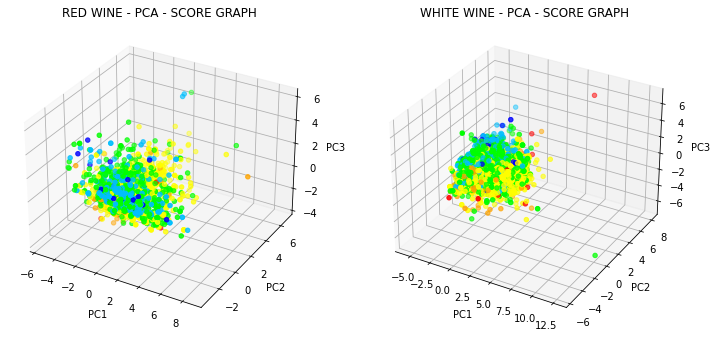

In [ ]:
fig_pca_winescore = plt.figure(figsize=(12,10)) 

ax1 = fig_pca_winescore.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(Z3p_redwine[:, 0], Z3p_redwine[:, 1], Z3p_redwine[:, 2], c=quality1)
plt.title('RED WINE - PCA - SCORE GRAPH')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2') 
ax1.set_zlabel('PC3')

ax2 = fig_pca_winescore.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(Z3p_whitewine[:, 0], Z3p_whitewine[:, 1], Z3p_whitewine[:, 2], c=quality2)
plt.title('WHITE WINE - PCA - SCORE GRAPH')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

plt.grid()
plt.show()

# MDA 

In [ ]:
y_redwine = red_wine['quality'].values
y_whitewine = white_wine['quality'].values

mda_redwine = MDA(n_dimensions=3)
mda_whitewine = MDA(n_dimensions=3)

mda_redwine.fit(X_redwine.values, y_redwine)
mda_whitewine.fit(X_whitewine.values, y_whitewine)

Z3m_redwine = mda_redwine.transform(X_redwine.values)
Z3m_whitewine = mda_whitewine.transform(X_whitewine.values)

C:\Users\marco\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\marco\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\marco\Anaconda3\lib\site-packages\matplotlib\colors.py:271: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


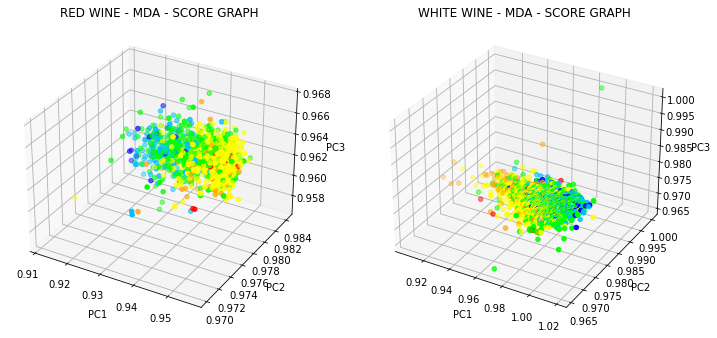

In [ ]:
fig_mda_winescore = plt.figure(figsize=(12,10)) 

ax1 = fig_mda_winescore.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(Z3m_redwine[:, 0], Z3m_redwine[:, 1], Z3m_redwine[:, 2], c=quality1)
plt.title('RED WINE - MDA - SCORE GRAPH')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

ax2 = fig_mda_winescore.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(Z3m_whitewine[:, 0], Z3m_whitewine[:, 1], Z3m_whitewine[:, 2], c=quality2)
plt.title('WHITE WINE - MDA - SCORE GRAPH')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

plt.grid()
plt.show()

# PROBLEMA BINARIO

Ho diviso il problema di multiclassificazione in un problema binario accorpando le classi.

In [ ]:
red_wine_copy = red_wine.copy()
red_wine_copy['quality'].replace([3, 4, 5], value=0, inplace=True)
red_wine_copy['quality'].replace([6, 7, 8], value=1, inplace=True)

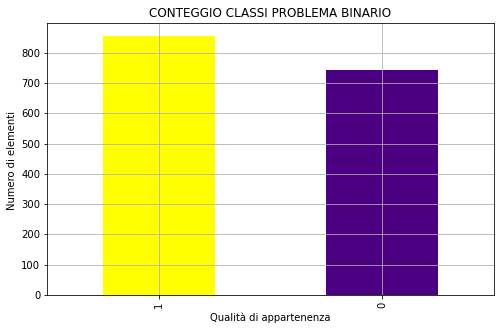

In [ ]:
plt.figure()
red_wine_copy['quality'].value_counts().plot.bar(figsize=(8,5), color=['yellow', 'indigo'])
plt.title('CONTEGGIO CLASSI PROBLEMA BINARIO')
plt.xlabel("Qualità di appartenenza")
plt.ylabel("Numero di elementi ")
plt.grid()

# CREAZIONE TRAINING, VALIDATION E TEST SET

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X = red_wine_copy.iloc[:, :-1].values
y = red_wine_copy['quality'].values
y_nomi_classe = ['classe 0', 'classe 1']

random_state = 20210526
test_p = 0.5
val_p = 0.4
indices = np.arange(X.shape[0])

ind_train, ind_test = train_test_split(indices, test_size=test_p, random_state=random_state, shuffle=True)
ind_train, ind_val = train_test_split(ind_train, test_size=val_p, random_state=random_state, shuffle=True)

# GRID SEARCH

In [ ]:
n_features = X.shape[1]

C_list = [2 ** i for i in range(-2, 3)]
gamma_list = [1 / (i * n_features) for i in np.arange(0.5, 1.75, 0.5)]
ker_list = ['rbf', 'poly', 'sigmoid', 'linear']

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(class_weight='balanced'))])
hparameters = {'svc__kernel':ker_list, 'svc__C':C_list, 'svc__gamma':gamma_list}

svm_gs = GridSearchCV(pipe, 
                      param_grid=hparameters, 
                      scoring='f1_weighted',
                      return_train_score=True,
                      cv=zip([ind_train], [ind_val]),verbose=True)
svm_gs.fit(X, y)

Fitting 1 folds for each of 60 candidates, totalling 60 fits


GridSearchCV(cv=<zip object at 0x000002081F099200>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.25, 0.5, 1, 2, 4],
                         'svc__gamma': [0.18181818181818182,
                                        0.09090909090909091,
                                        0.06060606060606061],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             return_train_score=True, scoring='f1_weighted', verbose=True)

In [ ]:
df_results = pd.DataFrame(svm_gs.cv_results_)

display(df_results.sort_values(['rank_test_score'], ascending=True))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
40,0.007545,0.0,0.011498,0.0,2,0.090909,rbf,"{'svc__C': 2, 'svc__gamma': 0.0909090909090909...",0.768497,0.768497,0.0,1,0.834984,0.834984,0.0
24,0.007348,0.0,0.008984,0.0,1,0.181818,rbf,"{'svc__C': 1, 'svc__gamma': 0.1818181818181818...",0.762500,0.762500,0.0,2,0.853805,0.853805,0.0
56,0.015078,0.0,0.018078,0.0,4,0.060606,rbf,"{'svc__C': 4, 'svc__gamma': 0.0606060606060606...",0.759185,0.759185,0.0,3,0.835073,0.835073,0.0
52,0.007000,0.0,0.008000,0.0,4,0.090909,rbf,"{'svc__C': 4, 'svc__gamma': 0.0909090909090909...",0.759034,0.759034,0.0,4,0.853656,0.853656,0.0
16,0.006994,0.0,0.008997,0.0,0.5,0.090909,rbf,"{'svc__C': 0.5, 'svc__gamma': 0.09090909090909...",0.753354,0.753354,0.0,5,0.797576,0.797576,0.0
0,0.011997,0.0,0.012008,0.0,0.25,0.181818,rbf,"{'svc__C': 0.25, 'svc__gamma': 0.1818181818181...",0.753180,0.753180,0.0,6,0.805888,0.805888,0.0
36,0.007069,0.0,0.008936,0.0,2,0.181818,rbf,"{'svc__C': 2, 'svc__gamma': 0.1818181818181818...",0.752775,0.752775,0.0,7,0.880899,0.880899,0.0
20,0.007070,0.0,0.008000,0.0,0.5,0.060606,rbf,"{'svc__C': 0.5, 'svc__gamma': 0.06060606060606...",0.750264,0.750264,0.0,8,0.778679,0.778679,0.0
12,0.005960,0.0,0.010009,0.0,0.5,0.181818,rbf,"{'svc__C': 0.5, 'svc__gamma': 0.18181818181818...",0.747110,0.747110,0.0,9,0.828829,0.828829,0.0
32,0.006989,0.0,0.008004,0.0,1,0.060606,rbf,"{'svc__C': 1, 'svc__gamma': 0.0606060606060606...",0.744020,0.744020,0.0,10,0.799679,0.799679,0.0


In [ ]:
# Calcolo delle predizioni sul test set.
# Nomi delle variabili:
#
# y_pred_train: vettore delle predizioni sul training;
# y_true_train: vettore dei target "veri" del training set;
# y_pred_val: vettore delle predizioni sul validation;
# y_true_val: vettore dei target "veri" del validation set;
#
# y_pred: vettore delle predizioni sul test;
# y_true: vettore dei target "veri" del test set

# Ri-addestramento della miglior SVM
svm_gs.best_estimator_.fit(X[ind_train, :], y[ind_train])

y_pred_train = svm_gs.best_estimator_.predict(X[ind_train, :])
y_true_train = y[ind_train]
y_pred_val = svm_gs.best_estimator_.predict(X[ind_val, :])
y_true_val = y[ind_val]

y_pred = svm_gs.best_estimator_.predict(X[ind_test, :])
y_true = y[ind_test]

acc_train = svm_gs.best_estimator_.score(X[ind_train, :], y_true_train)
prec_train = precision_score(y_true_train, y_pred_train, average='weighted')
rec_train = recall_score(y_true_train, y_pred_train, average='weighted')
f1_train = f1_score(y_true_train, y_pred_train, average='weighted')

acc_val = svm_gs.best_estimator_.score(X[ind_val, :], y_true_val)
prec_val = precision_score(y_true_val, y_pred_val, average='weighted')
rec_val = recall_score(y_true_val, y_pred_val, average='weighted')
f1_val = f1_score(y_true_val, y_pred_val, average='weighted')

acc = svm_gs.best_estimator_.score(X[ind_test, :], y_true)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_train, acc_val, acc], 
                        'Precision': [prec_train, prec_val, prec], 
                        'Recall': [rec_train, rec_val, rec],
                        'F1': [f1_train, f1_val, f1]
                       },
                      index=['training', 'validation', 'test'])
cmat = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_)
cmat_norm_true = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_, normalize='true')
cmat_norm_pred = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_, normalize='pred')

df_cmat = pd.DataFrame(cmat, columns=y_nomi_classe, index=y_nomi_classe)
df_cmat_norm_true = pd.DataFrame(cmat_norm_true, columns=y_nomi_classe, index=y_nomi_classe)
df_cmat_norm_pred = pd.DataFrame(cmat_norm_pred, columns=y_nomi_classe, index=y_nomi_classe)

display(df_perf)
display(df_cmat)
display(df_cmat_norm_true)
display(df_cmat_norm_pred)

,Accuracy,Precision,Recall,F1
training,0.835073,0.841927,0.835073,0.834984
validation,0.768750,0.780129,0.768750,0.768497
test,0.735000,0.747999,0.735000,0.734418


,classe 0,classe 1
classe 0,303,67
classe 1,145,285


,classe 0,classe 1
classe 0,0.818919,0.181081
classe 1,0.337209,0.662791


,classe 0,classe 1
classe 0,0.676339,0.190341
classe 1,0.323661,0.809659


# CREAZIONE TRAINING, VALIDATION E TEST SET

In [ ]:
from sklearn.neural_network import MLPClassifier


In [ ]:
random_state = 20210526
np.random.seed(random_state)

test_p = 0.5
val_p = 0.2

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=test_p, random_state=random_state, shuffle=True)

display(pd.DataFrame({'X_trainval': X_trainval.shape, 'X_test': X_test.shape}, index=['N. sanmples', 'N.features']))

,X_trainval,X_test
N. sanmples,799,800
N.features,11,11


# MLP

In [ ]:
standard_scaler = StandardScaler()
X_trainval = standard_scaler.fit_transform(X_trainval)
X_test = standard_scaler.transform(X_test)

In [ ]:
hidden_layer_sizes = [256] * 5
activation = 'relu'
patience = 75
max_epochs = 5000
verbose = False
batch_sz = 4

mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation,
                    early_stopping=True,
                    n_iter_no_change=patience,
                    max_iter=max_epochs,
                    validation_fraction=val_p,
                    batch_size=batch_sz,
                    verbose=verbose,
                    random_state=random_state,
                    solver='adam',
                    # learning_rate='adaptive'
                   )

In [ ]:
mlp.fit(X_trainval, y_trainval)

MLPClassifier(batch_size=4, early_stopping=True,
              hidden_layer_sizes=[256, 256, 256, 256, 256], max_iter=5000,
              n_iter_no_change=75, random_state=20210526,
              validation_fraction=0.2)

In [ ]:
y_pred_trainval = mlp.predict(X_trainval)
y_pred = mlp.predict(X_test)

acc_trainval = mlp.score(X_trainval, y_trainval)
prec_trainval = precision_score(y_trainval, y_pred_trainval, average='weighted')
rec_trainval = recall_score(y_trainval, y_pred_trainval, average='weighted')
f1_trainval = f1_score(y_trainval, y_pred_trainval, average='weighted')

acc = mlp.score(X_test, y_test)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_trainval, acc], 
                        'Precision': [prec_trainval, prec], 
                        'Recall': [rec_trainval, rec],
                        'F1': [f1_trainval, f1]
                       },
                      index=['train. + val.', 'test'])

cmat = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
cmat_norm_true = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='true')
cmat_norm_pred = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='pred')

df_cmat = pd.DataFrame(cmat, columns=y_nomi_classe, index=y_nomi_classe)
df_cmat_norm_true = pd.DataFrame(cmat_norm_true, columns=y_nomi_classe, index=y_nomi_classe)
df_cmat_norm_pred = pd.DataFrame(cmat_norm_pred, columns=y_nomi_classe, index=y_nomi_classe)

In [ ]:
display(df_perf)
display(df_cmat)
display(df_cmat_norm_true)
display(df_cmat_norm_pred)

,Accuracy,Precision,Recall,F1
train. + val.,0.906133,0.908098,0.906133,0.906228
test,0.770000,0.770454,0.770000,0.770150


,classe 0,classe 1
classe 0,282,88
classe 1,96,334


,classe 0,classe 1
classe 0,0.762162,0.237838
classe 1,0.223256,0.776744


,classe 0,classe 1
classe 0,0.746032,0.208531
classe 1,0.253968,0.791469


# PROBLEMA MULTICLASSE

In [ ]:
white_wine_copy = white_wine.copy()
white_wine_copy['quality'].replace([3, 4, 5], value=0, inplace=True)
white_wine_copy['quality'].replace([6], value=1, inplace=True)
white_wine_copy['quality'].replace([7, 8, 9], value=2, inplace=True)

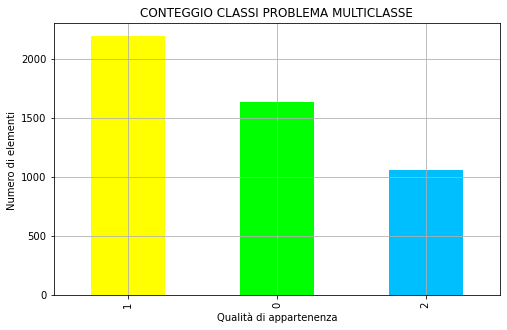

In [ ]:
plt.figure()
white_wine_copy['quality'].value_counts().plot.bar(figsize=(8,5), color=['yellow', 'lime', 'deepskyblue'])
plt.title('CONTEGGIO CLASSI PROBLEMA MULTICLASSE')
plt.xlabel("Qualità di appartenenza")
plt.ylabel("Numero di elementi ")
plt.grid()

# CREAZIONE TRAINING, VALIDATION E TEST SET

In [ ]:
X = white_wine_copy.iloc[:, :-1].values
y = white_wine_copy['quality'].values

y_nomi_classe = ['classe 0', 'classe 1', 'classe 2']
random_state = 20210526
test_p = 0.5
val_p = 0.4
indices = np.arange(X.shape[0])

ind_train, ind_test = train_test_split(indices, test_size=test_p, random_state=random_state, shuffle=True)
ind_train, ind_val = train_test_split(ind_train, test_size=val_p, random_state=random_state, shuffle=True)

# GRID SEARCH

## One-VS-One Classifier

In [ ]:
n_features = X.shape[1]

C_list = [2 ** i for i in range(-2, 4)]

gamma_list = [1 / (i * n_features) for i in np.arange(0.15, 1.75, 0.5)]
ker_list = ['rbf', 'poly', 'sigmoid', 'linear']

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(class_weight='balanced'))])
hparameters = {'svc__kernel':ker_list, 'svc__C':C_list, 'svc__gamma':gamma_list}

svm_gs = GridSearchCV(pipe, 
                      param_grid=hparameters, 
                      scoring='f1_weighted',
                      return_train_score=True,
                      cv=zip([ind_train], [ind_val]),
                      verbose=True)
svm_gs.fit(X, y)

Fitting 1 folds for each of 96 candidates, totalling 96 fits


GridSearchCV(cv=<zip object at 0x000002081F18FF00>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [0.25, 0.5, 1, 2, 4, 8],
                         'svc__gamma': [0.6060606060606061, 0.13986013986013984,
                                        0.0790513833992095,
                                        0.05509641873278237],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             return_train_score=True, scoring='f1_weighted', verbose=True)

In [ ]:
df_results = pd.DataFrame(svm_gs.cv_results_)

display(df_results.sort_values(['rank_test_score'], ascending=True))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
32,0.248112,0.0,0.260975,0.0,1,0.606061,rbf,"{'svc__C': 1, 'svc__gamma': 0.6060606060606061...",0.616671,0.616671,0.0,1,0.916047,0.916047,0.0
48,0.224565,0.0,0.231014,0.0,2,0.606061,rbf,"{'svc__C': 2, 'svc__gamma': 0.6060606060606061...",0.605966,0.605966,0.0,2,0.959079,0.959079,0.0
16,0.195342,0.0,0.232143,0.0,0.5,0.606061,rbf,"{'svc__C': 0.5, 'svc__gamma': 0.60606060606060...",0.601473,0.601473,0.0,3,0.864443,0.864443,0.0
64,0.178187,0.0,0.161851,0.0,4,0.606061,rbf,"{'svc__C': 4, 'svc__gamma': 0.6060606060606061...",0.600483,0.600483,0.0,4,0.988420,0.988420,0.0
80,0.191452,0.0,0.207417,0.0,8,0.606061,rbf,"{'svc__C': 8, 'svc__gamma': 0.6060606060606061...",0.596164,0.596164,0.0,5,0.998639,0.998639,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.173025,0.0,0.066444,0.0,0.5,0.606061,sigmoid,"{'svc__C': 0.5, 'svc__gamma': 0.60606060606060...",0.415959,0.415959,0.0,92,0.384390,0.384390,0.0
66,0.171998,0.0,0.093712,0.0,4,0.606061,sigmoid,"{'svc__C': 4, 'svc__gamma': 0.6060606060606061...",0.415526,0.415526,0.0,93,0.382663,0.382663,0.0
54,0.132167,0.0,0.059382,0.0,2,0.13986,sigmoid,"{'svc__C': 2, 'svc__gamma': 0.1398601398601398...",0.415054,0.415054,0.0,94,0.395357,0.395357,0.0
34,0.193967,0.0,0.093725,0.0,1,0.606061,sigmoid,"{'svc__C': 1, 'svc__gamma': 0.6060606060606061...",0.414129,0.414129,0.0,95,0.378037,0.378037,0.0


In [ ]:
# Calcolo delle predizioni sul test set.
# Nomi delle variabili:
#
# y_pred_train: vettore delle predizioni sul training;
# y_true_train: vettore dei target "veri" del training set;
# y_pred_val: vettore delle predizioni sul validation;
# y_true_val: vettore dei target "veri" del validation set;
#
# y_pred: vettore delle predizioni sul test;
# y_true: vettore dei target "veri" del test set

# Ri-addestramento della miglior SVM
svm_gs.best_estimator_.fit(X[ind_train, :], y[ind_train])

y_pred_train = svm_gs.best_estimator_.predict(X[ind_train, :])
y_true_train = y[ind_train]
y_pred_val = svm_gs.best_estimator_.predict(X[ind_val, :])
y_true_val = y[ind_val]

y_pred = svm_gs.best_estimator_.predict(X[ind_test, :])
y_true = y[ind_test]

acc_train = svm_gs.best_estimator_.score(X[ind_train, :], y_true_train)
prec_train = precision_score(y_true_train, y_pred_train, average='weighted')
rec_train = recall_score(y_true_train, y_pred_train, average='weighted')
f1_train = f1_score(y_true_train, y_pred_train, average='weighted')

acc_val = svm_gs.best_estimator_.score(X[ind_val, :], y_true_val)
prec_val = precision_score(y_true_val, y_pred_val, average='weighted')
rec_val = recall_score(y_true_val, y_pred_val, average='weighted')
f1_val = f1_score(y_true_val, y_pred_val, average='weighted')

acc = svm_gs.best_estimator_.score(X[ind_test, :], y_true)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_train, acc_val, acc], 
                        'Precision': [prec_train, prec_val, prec], 
                        'Recall': [rec_train, rec_val, rec],
                        'F1': [f1_train, f1_val, f1]
                       },
                      index=['training', 'validation', 'test'])
cmat = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_)
cmat_norm_true = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_, normalize='true')
cmat_norm_pred = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_, normalize='pred')

df_cmat = pd.DataFrame(cmat, columns=y_nomi_classe, index=y_nomi_classe)
df_cmat_norm_true = pd.DataFrame(cmat_norm_true, columns=y_nomi_classe, index=y_nomi_classe)
df_cmat_norm_pred = pd.DataFrame(cmat_norm_pred, columns=y_nomi_classe, index=y_nomi_classe)

display(df_perf)
display(df_cmat)
display(df_cmat_norm_true)
display(df_cmat_norm_pred)

,Accuracy,Precision,Recall,F1
training,0.916270,0.920993,0.916270,0.916047
validation,0.617347,0.616553,0.617347,0.616671
test,0.610453,0.611128,0.610453,0.608085


,classe 0,classe 1,classe 2
classe 0,594,182,40
classe 1,311,617,188
classe 2,56,177,284


,classe 0,classe 1,classe 2
classe 0,0.727941,0.223039,0.049020
classe 1,0.278674,0.552867,0.168459
classe 2,0.108317,0.342360,0.549323


,classe 0,classe 1,classe 2
classe 0,0.618106,0.186475,0.078125
classe 1,0.323621,0.632172,0.367188
classe 2,0.058273,0.181352,0.554688


## One-VS-Rest Classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
n_features = X.shape[1]

C_list = [2 ** i for i in range(-2, 4)]

gamma_list = [1 / (i * n_features) for i in np.arange(0.15, 1.75, 0.5)]
ker_list = ['rbf', 'poly', 'sigmoid', 'linear']

model_to_set = OneVsRestClassifier(SVC())

pipe = Pipeline([('scaler', StandardScaler()), ('svc', model_to_set)])
hparameters = {'svc__estimator__kernel':ker_list, 'svc__estimator__C':C_list, 'svc__estimator__gamma':gamma_list}

svm_gs = GridSearchCV(pipe, 
                      param_grid=hparameters, 
                      scoring='f1_weighted',
                      return_train_score=True,
                      cv=zip([ind_train], [ind_val]),
                      verbose=True)
svm_gs.fit(X, y)

Fitting 1 folds for each of 96 candidates, totalling 96 fits


GridSearchCV(cv=<zip object at 0x000002081F187E40>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        OneVsRestClassifier(estimator=SVC()))]),
             param_grid={'svc__estimator__C': [0.25, 0.5, 1, 2, 4, 8],
                         'svc__estimator__gamma': [0.6060606060606061,
                                                   0.13986013986013984,
                                                   0.0790513833992095,
                                                   0.05509641873278237],
                         'svc__estimator__kernel': ['rbf', 'poly', 'sigmoid',
                                                    'linear']},
             return_train_score=True, scoring='f1_weighted', verbose=True)

In [ ]:
df_results = pd.DataFrame(svm_gs.cv_results_)

display(df_results.sort_values(['rank_test_score'], ascending=True))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__estimator__C,param_svc__estimator__gamma,param_svc__estimator__kernel,params,split0_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,mean_train_score,std_train_score
32,0.406432,0.0,0.562931,0.0,1,0.606061,rbf,"{'svc__estimator__C': 1, 'svc__estimator__gamm...",0.620324,0.620324,0.0,1,0.946892,0.946892,0.0
16,0.379901,0.0,0.551248,0.0,0.5,0.606061,rbf,"{'svc__estimator__C': 0.5, 'svc__estimator__ga...",0.613182,0.613182,0.0,2,0.901359,0.901359,0.0
48,0.409515,0.0,0.479717,0.0,2,0.606061,rbf,"{'svc__estimator__C': 2, 'svc__estimator__gamm...",0.610475,0.610475,0.0,3,0.976851,0.976851,0.0
56,0.479435,0.0,0.612327,0.0,2,0.079051,rbf,"{'svc__estimator__C': 2, 'svc__estimator__gamm...",0.605043,0.605043,0.0,4,0.706456,0.706456,0.0
0,0.410494,0.0,0.693880,0.0,0.25,0.606061,rbf,"{'svc__estimator__C': 0.25, 'svc__estimator__g...",0.604446,0.604446,0.0,5,0.887015,0.887015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0.343415,0.0,0.186540,0.0,0.5,0.606061,sigmoid,"{'svc__estimator__C': 0.5, 'svc__estimator__ga...",0.418415,0.418415,0.0,92,0.381240,0.381240,0.0
34,0.324560,0.0,0.150649,0.0,1,0.606061,sigmoid,"{'svc__estimator__C': 1, 'svc__estimator__gamm...",0.418154,0.418154,0.0,93,0.374070,0.374070,0.0
66,0.315403,0.0,0.176261,0.0,4,0.606061,sigmoid,"{'svc__estimator__C': 4, 'svc__estimator__gamm...",0.416385,0.416385,0.0,94,0.375481,0.375481,0.0
82,0.239063,0.0,0.123680,0.0,8,0.606061,sigmoid,"{'svc__estimator__C': 8, 'svc__estimator__gamm...",0.413933,0.413933,0.0,95,0.373698,0.373698,0.0


In [ ]:
# Calcolo delle predizioni sul test set.
# Nomi delle variabili:
#
# y_pred_train: vettore delle predizioni sul training;
# y_true_train: vettore dei target "veri" del training set;
# y_pred_val: vettore delle predizioni sul validation;
# y_true_val: vettore dei target "veri" del validation set;
#
# y_pred: vettore delle predizioni sul test;
# y_true: vettore dei target "veri" del test set

# Ri-addestramento della miglior SVM
svm_gs.best_estimator_.fit(X[ind_train, :], y[ind_train])

y_pred_train = svm_gs.best_estimator_.predict(X[ind_train, :])
y_true_train = y[ind_train]
y_pred_val = svm_gs.best_estimator_.predict(X[ind_val, :])
y_true_val = y[ind_val]

y_pred = svm_gs.best_estimator_.predict(X[ind_test, :])
y_true = y[ind_test]

acc_train = svm_gs.best_estimator_.score(X[ind_train, :], y_true_train)
prec_train = precision_score(y_true_train, y_pred_train, average='weighted')
rec_train = recall_score(y_true_train, y_pred_train, average='weighted')
f1_train = f1_score(y_true_train, y_pred_train, average='weighted')

acc_val = svm_gs.best_estimator_.score(X[ind_val, :], y_true_val)
prec_val = precision_score(y_true_val, y_pred_val, average='weighted')
rec_val = recall_score(y_true_val, y_pred_val, average='weighted')
f1_val = f1_score(y_true_val, y_pred_val, average='weighted')

acc = svm_gs.best_estimator_.score(X[ind_test, :], y_true)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_train, acc_val, acc], 
                        'Precision': [prec_train, prec_val, prec], 
                        'Recall': [rec_train, rec_val, rec],
                        'F1': [f1_train, f1_val, f1]
                       },
                      index=['training', 'validation', 'test'])
cmat = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_)
cmat_norm_true = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_, normalize='true')
cmat_norm_pred = confusion_matrix(y_true, y_pred, labels=svm_gs.best_estimator_.classes_, normalize='pred')

df_cmat = pd.DataFrame(cmat, columns=y_nomi_classe, index=y_nomi_classe)
df_cmat_norm_true = pd.DataFrame(cmat_norm_true, columns=y_nomi_classe, index=y_nomi_classe)
df_cmat_norm_pred = pd.DataFrame(cmat_norm_pred, columns=y_nomi_classe, index=y_nomi_classe)

display(df_perf)
display(df_cmat)
display(df_cmat_norm_true)
display(df_cmat_norm_pred)

,Accuracy,Precision,Recall,F1
training,0.946903,0.946952,0.946903,0.946892
validation,0.621429,0.626241,0.621429,0.620324
test,0.618620,0.618431,0.618620,0.615080


,classe 0,classe 1,classe 2
classe 0,559,231,26
classe 1,274,724,118
classe 2,52,233,232


,classe 0,classe 1,classe 2
classe 0,0.685049,0.283088,0.031863
classe 1,0.245520,0.648746,0.105735
classe 2,0.100580,0.450677,0.448743


,classe 0,classe 1,classe 2
classe 0,0.631638,0.194444,0.069149
classe 1,0.309605,0.609428,0.313830
classe 2,0.058757,0.196128,0.617021


# CREAZIONE TRAINING, VALIDATION E TEST SET

In [ ]:
X = white_wine_copy.iloc[:, :-1].values
y = white_wine_copy['quality'].values

y_nomi_classe = ['classe 0', 'classe 1', 'classe 2']

wine_counts = white_wine_copy['quality'].value_counts()
Nmin = wine_counts.min()
name_class_Nmin = wine_counts.index[wine_counts.argmin()]

display(pd.DataFrame({'numero classe': wine_counts.index,  
                      'conteggio elementi': wine_counts.values}
                    )
       )

display(pd.DataFrame({'N_min': Nmin, 'name': name_class_Nmin}, index=[0]))

# Creazione nuovo training + validation set 

Nmin_half = int(np.round(Nmin * 0.5))

indsX_trainval_list = []
indsX_test_list = []

for t in range(3): 
    indsX_t = np.argwhere(y == t).flatten() # indici corrispondenti a immagini con target t
    indsX_trainval_t, indsX_test_t = train_test_split(indsX_t, 
                                                      train_size=Nmin_half,
                                                      random_state=random_state, 
                                                      shuffle=True)
    indsX_trainval_list.append(indsX_trainval_t)
    indsX_test_list.append(indsX_test_t)

indsX_trainval = np.concatenate(indsX_trainval_list, axis=0)
indsX_test = np.concatenate(indsX_test_list, axis=0)

# Mescoliamo (giusto per sicurezza) gli indici
np.random.shuffle(indsX_trainval)
np.random.shuffle(indsX_test)

X_trainval = X[indsX_trainval, :]
y_trainval = y[indsX_trainval]

X_test = X[indsX_test, :]
y_test = y[indsX_test]

display(pd.DataFrame({'trainval_size': len(y_trainval), 'test_size': len(y_test)}, index=[0]))

,numero classe,conteggio elementi
0,1,2198
1,0,1640
2,2,1060


,N_min,name
0,1060,2


,trainval_size,test_size
0,1590,3308


# MLP

In [ ]:
standard_scaler = StandardScaler()
X_trainval = standard_scaler.fit_transform(X_trainval)
X_test = standard_scaler.transform(X_test)

In [ ]:
random_state = 20210526
val_p = 0.2

hidden_layer_sizes = [256] * 5
activation = 'relu'
patience = 75
max_epochs = 5000
verbose = False
batch_sz = 4

# Inizializzazione MLP
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation,
                    early_stopping=True,
                    n_iter_no_change=patience,
                    max_iter=max_epochs,
                    validation_fraction=val_p,
                    batch_size=batch_sz,
                    verbose=verbose,
                    random_state=random_state,
                    solver='adam',
                   )

In [ ]:
mlp.fit(X_trainval, y_trainval)

MLPClassifier(batch_size=4, early_stopping=True,
              hidden_layer_sizes=[256, 256, 256, 256, 256], max_iter=5000,
              n_iter_no_change=75, random_state=20210526,
              validation_fraction=0.2)

In [ ]:
y_pred_trainval = mlp.predict(X_trainval)
y_pred = mlp.predict(X_test)

acc_trainval = mlp.score(X_trainval, y_trainval)
prec_trainval = precision_score(y_trainval, y_pred_trainval, average='weighted')
rec_trainval = recall_score(y_trainval, y_pred_trainval, average='weighted')
f1_trainval = f1_score(y_trainval, y_pred_trainval, average='weighted')

acc = mlp.score(X_test, y_test)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_trainval, acc], 
                        'Precision': [prec_trainval, prec], 
                        'Recall': [rec_trainval, rec],
                        'F1': [f1_trainval, f1]
                       },
                      index=['train. + val.', 'test'])

cmat = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
cmat_norm_true = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='true')
cmat_norm_pred = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='pred')

df_cmat = pd.DataFrame(cmat, columns=y_nomi_classe, index=y_nomi_classe)
df_cmat_norm_true = pd.DataFrame(cmat_norm_true, columns=y_nomi_classe, index=y_nomi_classe)
df_cmat_norm_pred = pd.DataFrame(cmat_norm_pred, columns=y_nomi_classe, index=y_nomi_classe)

In [ ]:
display(df_perf)
display(df_cmat)
display(df_cmat_norm_true)
display(df_cmat_norm_pred)

,Accuracy,Precision,Recall,F1
train. + val.,0.827673,0.829054,0.827673,0.826116
test,0.557739,0.593401,0.557739,0.553784


,classe 0,classe 1,classe 2
classe 0,796,224,90
classe 1,531,702,435
classe 2,58,125,347


,classe 0,classe 1,classe 2
classe 0,0.717117,0.201802,0.081081
classe 1,0.318345,0.420863,0.260791
classe 2,0.109434,0.235849,0.654717


,classe 0,classe 1,classe 2
classe 0,0.574729,0.213130,0.103211
classe 1,0.383394,0.667935,0.498853
classe 2,0.041877,0.118934,0.397936


# 